<a href="https://colab.research.google.com/github/okagen/study/blob/master/studyGoogleColaboratory02_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting with Prophet
Prophetを用いて、時系列予測を行う

In [0]:
## Execute below once.
# pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [0]:
## Execute below once.
#from google.colab import files
#uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings

# Ignore wornings.
warnings.filterwarnings("ignore")

In [0]:
df = pd.read_csv('AirPassengers.csv', 
                 parse_dates = ["Month"],
                 index_col= ["Month"],
                 dtype = {'#Passengers' : 'float'})

In [0]:
from fbprophet import Prophet

In [0]:
# slice the DataFrame.
train = df[:"1958-12-31"]
# re-form it as a train data.
train = train.reset_index().rename(columns={'Month' : 'ds', '#Passengers' : 'y'})

In [0]:
m = Prophet(growth = "linear",
           yearly_seasonality = 10,
           weekly_seasonality = False,
           daily_seasonality = False,
           seasonality_mode = 'multiplicative',
           changepoint_prior_scale=0.1).fit(train)

In [0]:
future = m.make_future_dataframe(periods = 48, freq='MS')

In [0]:
forecast = m.predict(df =  future)

## Step 3 : Analyse

### Show significant changepoints of trend on prophet forecast plot.
トレンドの変化点をプロットする。

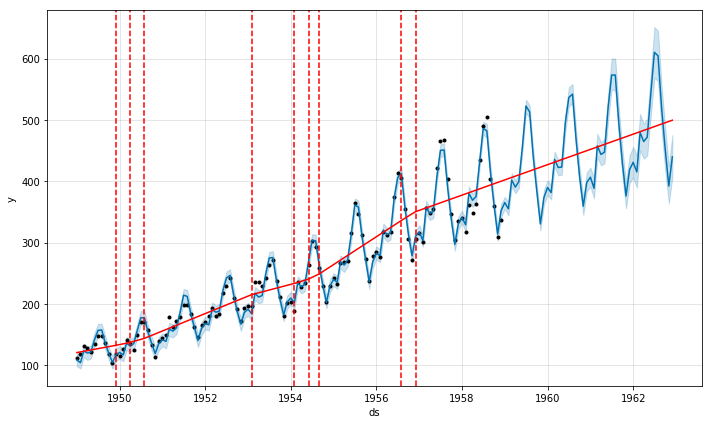

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Show trend transision and yearly cycle.
トレンドの推移と、年周期を表示

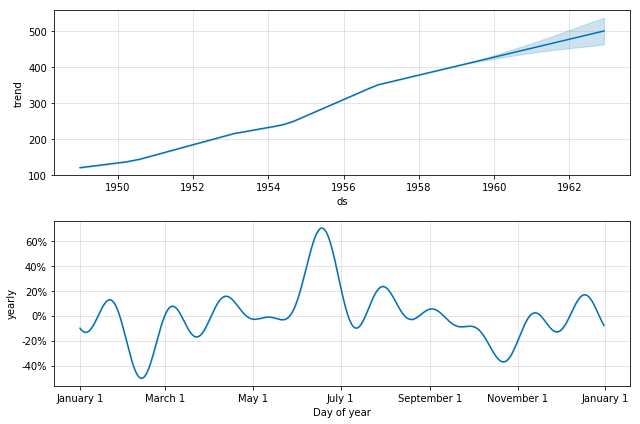

In [13]:
fig = m.plot_components(forecast)

### Show autocorrelation function.
自己相関関数を表示

Text(0, 0.5, 'ACF')

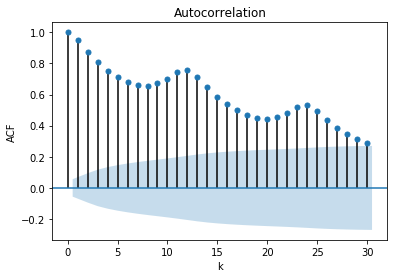

In [14]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df["#Passengers"], lags = 30, alpha = 0.5)
plt.xlabel("k")
plt.ylabel("ACF")

### Compare the predict data with the actual data.
予測データと実績データとの比較。
  - Show the actual data on a scatter chart. / 実際の観測点を散布図に表示。

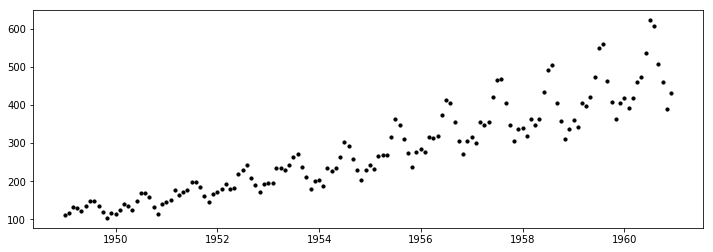

In [15]:
plt.figure(figsize=(12,4))
plt.scatter(df.index, df["#Passengers"], color = "black", s = 10)

  - Plot predict data on the scatter chart of the actual data. / 実績の散布図時に予測データを重ねる。

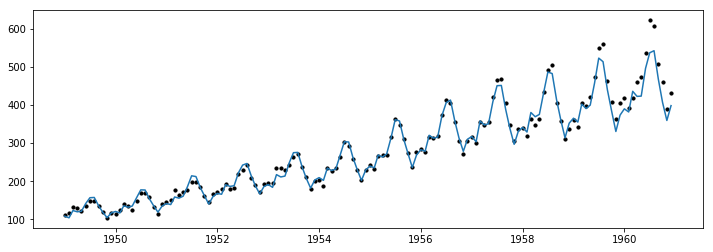

In [16]:
plt.figure(figsize=(12,4))
plt.scatter(df.index, df["#Passengers"], color = "black", s = 10)
plt.plot(forecast["ds"][:144], forecast["yhat"][:144])

  - Plot confidence interval on the chart above. / 上のチャートに信頼区間をプロット。

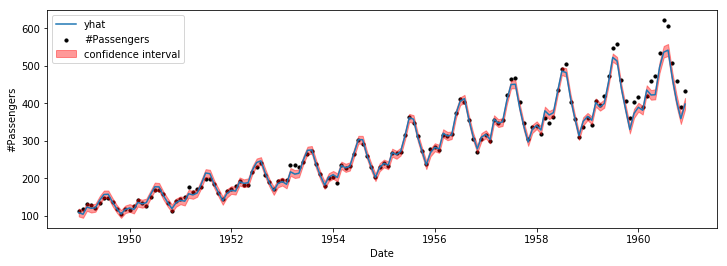

In [17]:
plt.figure(figsize=(12,4))
plt.scatter(df.index, df["#Passengers"], color = "black", s = 10)
plt.plot(forecast["ds"][:144], forecast["yhat"][:144])

plt.fill_between(df.index, 
                 forecast["yhat_upper"][:144],
                 forecast["yhat_lower"][:144],
                 color="red", alpha = .4, label ="confidence interval"
                )

plt.xlabel("Date")
plt.ylabel("#Passengers")
plt.legend()